In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/MA4207_project')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
# Load the training and testing data
train_data = pd.read_csv('Rock_TRAIN.txt', header=None, delim_whitespace=True)
test_data = pd.read_csv('Rock_TEST.txt', header=None, delim_whitespace=True)

# Separate features and labels
X_train = train_data.drop(0, axis=1)
y_train = train_data[0]
X_test = test_data.drop(0, axis=1)
y_test = test_data[0]
X = np.vstack((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [ ]:
#print data head, shape
X_train.head()
print(X_train.shape)

,1,2,3,4,5,6,7,8,9,10,...,2835,2836,2837,2838,2839,2840,2841,2842,2843,2844
0,13.0795,13.0830,13.6777,13.4523,13.3003,13.6128,13.6240,13.4710,13.4057,13.6267,...,3.1106,3.4116,3.0478,3.1725,3.6060,3.0694,3.4716,3.4359,2.5912,1.7330
1,15.7033,15.6403,15.5077,15.5921,15.5123,15.6186,15.6814,15.7223,15.6500,15.6017,...,3.3694,3.1444,2.1304,2.7089,3.5878,3.6408,3.0208,3.3958,2.3676,2.0937
2,14.1110,14.4410,14.5290,14.5120,14.5200,14.5970,14.6140,14.4870,14.7580,14.7580,...,2.8584,3.9037,2.8594,0.0000,0.3150,1.3575,0.0000,0.0000,1.5150,3.2175
3,11.7140,11.9360,12.2330,12.2200,12.2270,12.0040,12.1180,12.1000,12.1770,12.1770,...,1.5328,1.3575,1.5384,1.4221,1.0753,1.4990,1.6050,1.0294,0.9000,1.0800
4,3.1037,3.4368,3.4189,3.3985,3.5107,3.4800,3.6024,3.5714,3.6326,3.8351,...,1.3135,2.9147,4.2356,2.8987,1.3743,0.8850,1.7475,1.5787,1.4625,0.0000


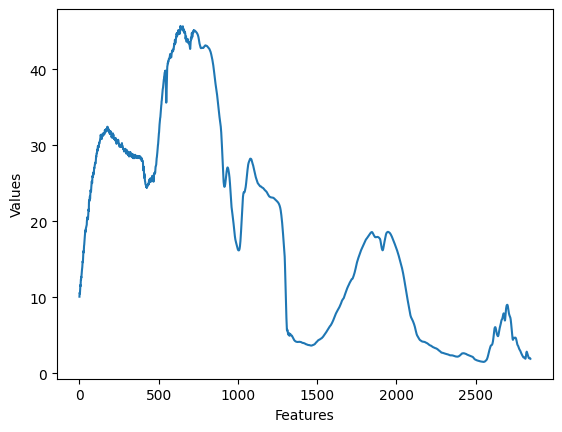

In [ ]:
#plot a random data sample
plt.plot(X_train.iloc[19])
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, accuracy_score, precision_recall_fscore_support, normalized_mutual_info_score

# PCA and Classifier Pipeline
pca = PCA(n_components=0.99)  # Adjust components to cover 99% of variance
rf_clf = RandomForestClassifier(n_estimators=135, random_state=42)
svm_clf = SVC(kernel='linear', random_state=42, probability=True)

# Creating a pipeline for scaling, PCA, and classification
rf_pipeline = make_pipeline(StandardScaler(), pca, rf_clf)
svm_pipeline = make_pipeline(StandardScaler(), pca, svm_clf)

# Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Multiple metrics evaluation
def score_per_class(y_true, y_pred, score, class_label):
    score = precision_recall_fscore_support(y_true, y_pred, average=None)[score][class_label]
    return score

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision_0': make_scorer(score_per_class, score=0, class_label=0),
           'precision_1': make_scorer(score_per_class, score=0, class_label=1),
           'precision_2': make_scorer(score_per_class, score=0, class_label=2),
           'precision_3': make_scorer(score_per_class, score=0, class_label=3),
           'recall_0': make_scorer(score_per_class, score=1, class_label=0),
           'recall_1': make_scorer(score_per_class, score=1, class_label=1),
           'recall_2': make_scorer(score_per_class, score=1, class_label=2),
           'recall_3': make_scorer(score_per_class, score=1, class_label=3),
           'f1_0': make_scorer(score_per_class, score=2, class_label=0),
           'f1_1': make_scorer(score_per_class, score=2, class_label=1),
           'f1_2': make_scorer(score_per_class, score=2, class_label=2),
           'f1_3': make_scorer(score_per_class, score=2, class_label=3),
           'supp_0': make_scorer(score_per_class, score=3, class_label=0),
           'supp_1': make_scorer(score_per_class, score=3, class_label=1),
           'supp_2': make_scorer(score_per_class, score=3, class_label=2),
           'supp_3': make_scorer(score_per_class, score=3, class_label=3),
           }


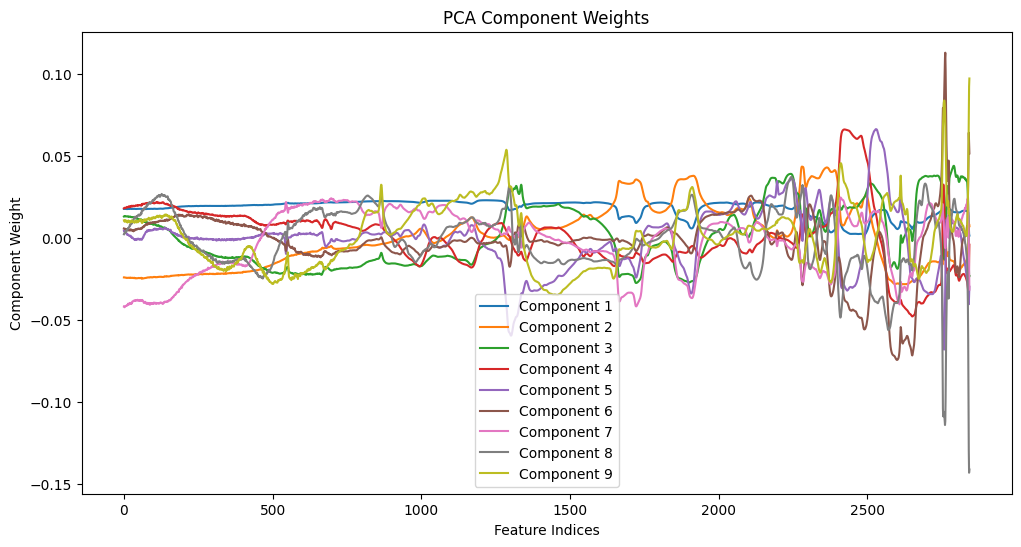

Number of PCA components: 9
Number of elements in a feature row: 2844


In [11]:
from sklearn.pipeline import Pipeline

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', pca),
    ('classifier', rf_clf)
])

# Fit the model on training data
pipeline.fit(X_train, y_train)

# Predict on test data
predictions = pipeline.predict(X_test)

# Feature Importance from Random Forest
feature_importances = pipeline.named_steps['classifier'].feature_importances_

# PCA Components
pca_components = pipeline.named_steps['pca'].components_

plt.figure(figsize=(12, 6))
for i, comp in enumerate(pca_components):
    plt.plot(comp, label=f'Component {i + 1}')
plt.legend()
plt.title('PCA Component Weights')
plt.xlabel('Feature Indices')
plt.ylabel('Component Weight')
plt.show()

print(f"Number of PCA components: {len(pca_components)}")
print(f"Number of elements in a feature row: {X_train.shape[1]}")


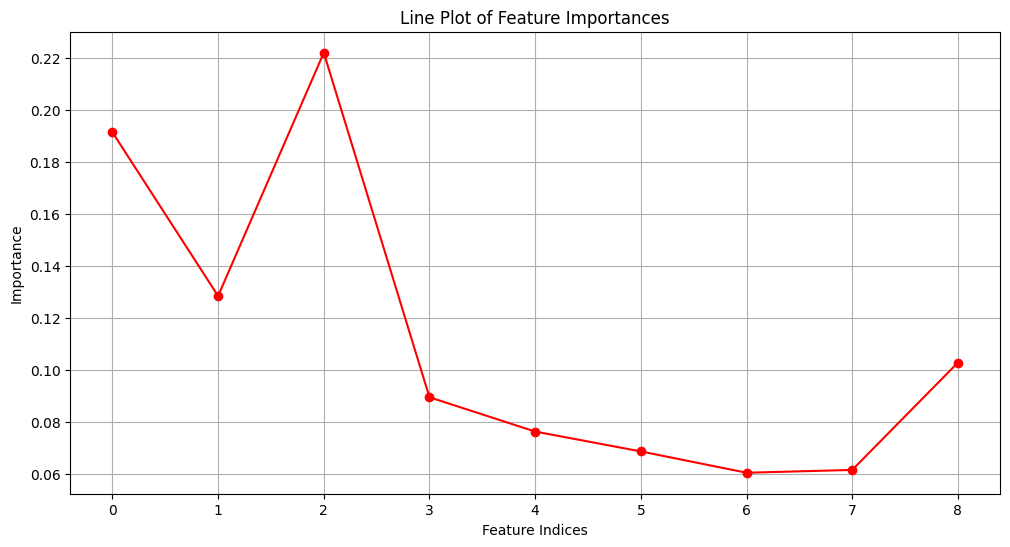

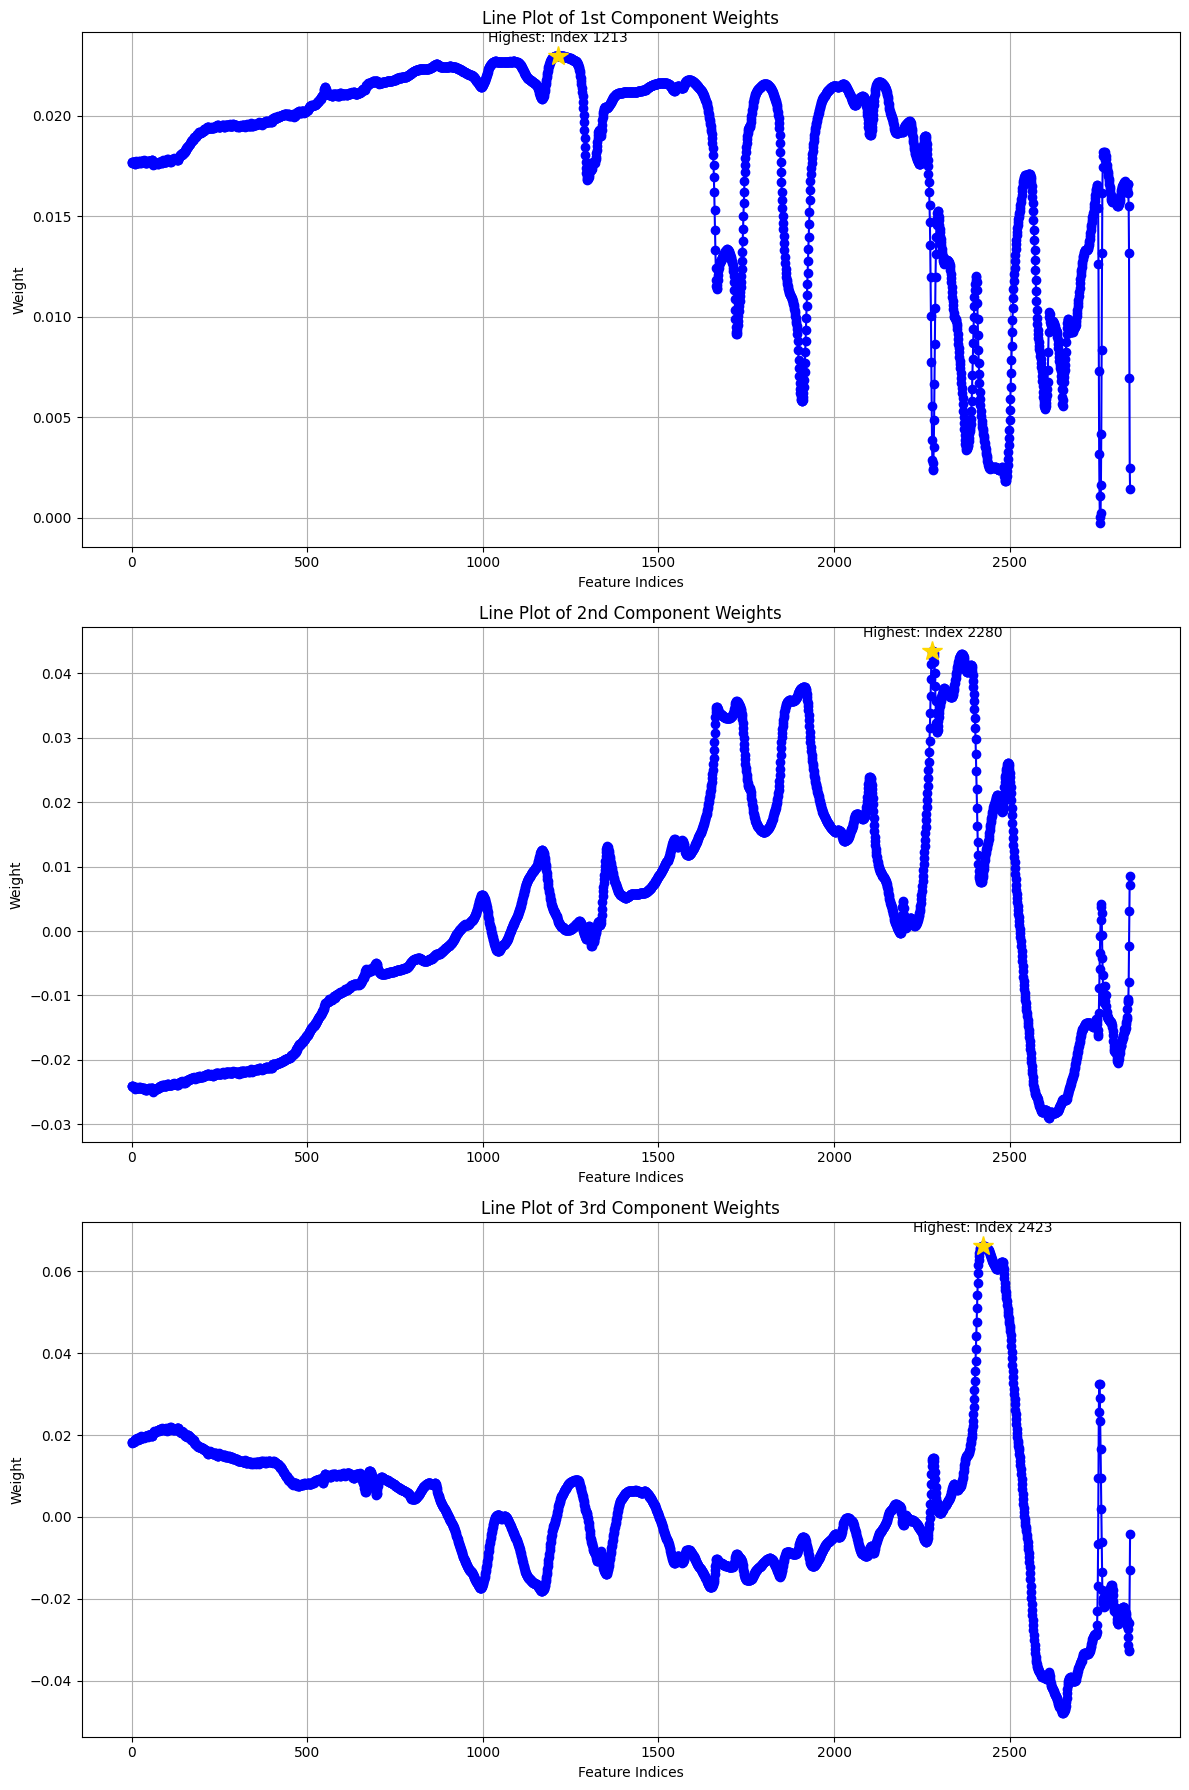

Number of PCA components: 9
Number of elements in a feature row: 2844


In [13]:
plt.figure(figsize=(12, 6))
plt.plot(feature_importances, marker='o', linestyle='-', color='r')
plt.title('Line Plot of Feature Importances')
plt.xlabel('Feature Indices')
plt.ylabel('Importance')
plt.grid(True)
plt.show()

# Extract specific PCA components
selected_components = pca_components[[0, 1, 3]]

# Define a threshold for highlighting high loading coefficients
threshold = 0.2

# Plotting the selected PCA Components using line plots
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
component_names = ['1st Component', '2nd Component', '3rd Component']
for i in range(len(selected_components)):
    component = selected_components[i]
    ax[i].plot(component, marker='o', linestyle='-', color='b')
    ax[i].set_title(f'Line Plot of {component_names[i]} Weights')
    ax[i].set_xlabel('Feature Indices')
    ax[i].set_ylabel('Weight')
    ax[i].grid(True)

    # Highlight features with high loading coefficients
    high_loadings = np.where(np.abs(component) > threshold)[0]
    for feature in high_loadings:
        ax[i].plot(feature, component[feature], marker='o', markersize=10, color='red')

    # Mark the feature with the highest loading coefficient
    max_loading_index = np.argmax(np.abs(component))
    max_loading_value = component[max_loading_index]
    ax[i].plot(max_loading_index, max_loading_value, marker='*', markersize=15, color='gold')
    ax[i].annotate(f'Highest: Index {max_loading_index}',
                   xy=(max_loading_index, max_loading_value),
                   textcoords="offset points",
                   xytext=(0,10),
                   ha='center')

plt.tight_layout()
plt.show()

print(f"Number of PCA components: {len(pca_components)}")
print(f"Number of elements in a feature row: {X_train.shape[1]}")


In [ ]:
rf_results = cross_validate(rf_pipeline, X, y, cv=cv, scoring=scoring)
svm_results = cross_validate(svm_pipeline, X, y, cv=cv, scoring=scoring)

print("Random Forest Metrics:")
for metric, scores in rf_results.items():
    #print(f"{metric}: Mean={scores.mean():.2f}, Std Deviation={scores.std() * 2:.2f}")
    print(f"{metric}",scores)

# Output the results for SVM
print("\nLinear SVM Metrics:")
for metric, scores in svm_results.items():
    #print(f"{metric}: Mean={scores.mean():.2f}, Std Deviation={scores.std() * 2:.2f}")
    print(f"{metric}",scores)

Random Forest Metrics:
fit_time [0.45579743 0.46974564 0.41718078 0.36631894 0.36916494]
score_time [0.04922771 0.10562229 0.11171985 0.11163807 0.04453421]
test_accuracy [0.92857143 0.92857143 0.71428571 0.78571429 1.        ]
test_NMI [0.89779937 0.86574601 0.62657632 0.65561265 1.        ]
test_precision_0 [1.         0.83333333 0.66666667 0.83333333 1.        ]
test_precision_1 [1.   1.   1.   0.75 1.  ]
test_precision_2 [1.         1.         0.66666667 1.         1.        ]
test_precision_3 [0.75       1.         0.5        0.66666667 1.        ]
test_recall_0 [1.  1.  0.8 1.  1. ]
test_recall_1 [0.5 1.  1.  1.  1. ]
test_recall_2 [1.  1.  1.  0.5 1. ]
test_recall_3 [1.   0.75 0.25 0.5  1.  ]
test_f1_0 [1.         0.90909091 0.72727273 0.90909091 1.        ]
test_f1_1 [0.66666667 1.         1.         0.85714286 1.        ]
test_f1_2 [1.         1.         0.8        0.66666667 1.        ]
test_f1_3 [0.85714286 0.85714286 0.33333333 0.57142857 1.        ]
test_supp_0 [6 5 5 5 5]

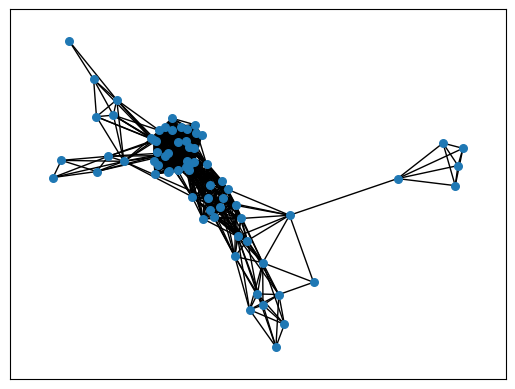

density: 0.2902691511387164
mean degree: 20.02857142857143
clustering coefficient: 0.8047359044900099
no. of connected components: 1
diameter: 6
mean path length: 2.396273291925466
nmi score: 0.46526755306685447


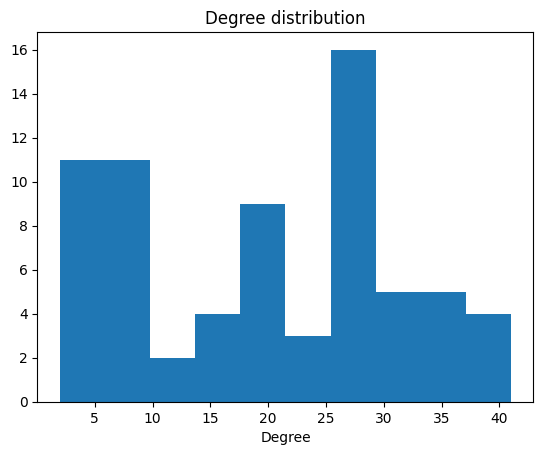

In [ ]:
from sklearn import neighbors
from scipy.cluster import hierarchy as hi
from sklearn.metrics import normalized_mutual_info_score
import networkx as nx

#concatenate data
train_data = pd.read_csv("Rock_TEST.txt", header=None, delim_whitespace=True)
test_data = pd.read_csv("Rock_TRAIN.txt", header=None, delim_whitespace=True)
data = pd.concat([train_data, test_data])

#remove the labels
labels = data.iloc[:, 0].values
features = data.iloc[:, 1:].values

#scale the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#PCA
pca = PCA(n_components=0.99)  # Retain 99% of variance
pca_data= pca.fit_transform(features_scaled)

#create the network
net=neighbors.radius_neighbors_graph(pca_data,radius=50, mode='distance',metric='euclidean').toarray()
G=nx.from_numpy_array(net)

#find degree for each node
degs=np.zeros(len(net))
for i in range (len(net)):
    for j in net[i]:
        if j!=0:
            degs[i]+=1

#calculate measures
density=sum(degs)*0.5/((len(net)**2-len(net))/2)
avgdeg=sum(degs)/len(net)
clustcoeff=nx.average_clustering(G)
comps=[c for c in nx.components.connected_components(G)]
ncomps=len(comps)
diam=nx.diameter(G)
avgpl=nx.average_shortest_path_length(G)

#draw network
nx.draw_networkx(G,node_size=30,with_labels=False)
plt.show()

#cluster
d=hi.distance.pdist(pca_data)
L = hi.linkage(d, method = 'average')
clust = hi.cut_tree(L, n_clusters = 4)
hcluster = np.transpose(clust)[0]

measures=[density,avgdeg,clustcoeff,ncomps,diam,avgpl]
names=["density","mean degree","clustering coefficient","no. of connected components","diameter","mean path length"]

for i in range(len(measures)):
    print(names[i]+": "+str(measures[i]))
print("nmi score:",normalized_mutual_info_score(labels, hcluster))

plt.hist(degs)
plt.xlabel("Degree")
plt.title("Degree distribution")
plt.show()

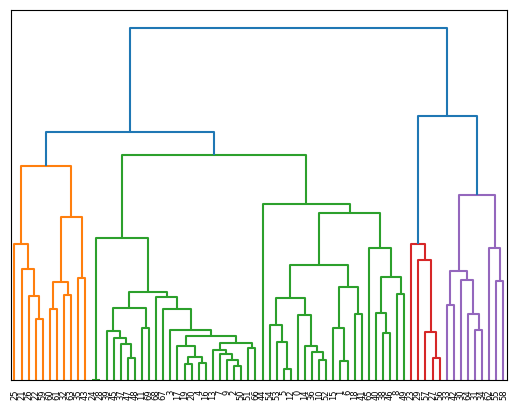

In [ ]:
#print dendogram
dn = hi.dendrogram(L)
plt.yticks([])
plt.show()